In [57]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, zscore

In [67]:
# to load the dataseDatalink
df = pd.read_csv("C:/Users/asus/Downloads/house_price.csv")

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [73]:
# Display top rows
print(df.head(5))

                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


# Q1 Basic EDA

In [75]:
print("Basic EDA")
print("Shape of dataset:", df.shape)
print("Columns:", df.columns)
print("Missing values:", df.isnull().sum())
print("Summary statistics:", df.describe())

Basic EDA
Shape of dataset: (13200, 7)
Columns: Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')
Missing values: location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64
Summary statistics:          total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40

# Q2 Outlier Detection and treatment

In [79]:
# a) Mean and Standard Deviation
col = 'price_per_sqft'
mean = df[col].mean()
std =  df[col].std()
lower_limit = mean - 3*std
upper_limit = mean + 3*std
mean_std_data = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)][col]

In [91]:
print(mean)
print(std)
print(lower_limit)
print(upper_limit)
print(mean_std_data)

15312.099999999977
3.616287917446524e-09
-312261.1442419011
328101.8177267496
0         3699
1         4615
2         4305
3         6245
4         4250
         ...  
13195     6689
13196    11111
13197     5258
13198    10407
13199     3090
Name: price_per_sqft, Length: 13195, dtype: int64


In [94]:
# b) Percentile Method(5th and 95th)
lower_percentile = df[col].quantile(0.05)
upper_percentile = df[col] = df[col].quantile (0.95)
percentile_data = df[(df[col] >= lower_percentile) & (df[col] <= upper_percentile)][col]
print(lower_percentile)
print(upper_percentile)
print(percentile_data)

15312.099999999984
15312.099999999984
0        15312.1
1        15312.1
2        15312.1
3        15312.1
4        15312.1
          ...   
13195    15312.1
13196    15312.1
13197    15312.1
13198    15312.1
13199    15312.1
Name: price_per_sqft, Length: 13200, dtype: float64


In [107]:
# c) IQR method
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_fence = 1.5 * IQR
upper_fence = 1.5 * IQR
iqr_data = df[(df[col] >= lower_fence) & (df[col] <=upper_fence)][col]

In [105]:
print(Q1)
print(Q3)
print(IQR)
print(lower_fence)
print(upper_fence)
print(iqr_data)

15312.099999999984
15312.099999999984
0.0
0.0
0.0
Series([], Name: price_per_sqft, dtype: float64)


In [110]:
# d) Z-score Method
z_scores = zscore(df[col])
z_data = df[(np.abs(z_scores) < 3)][col]
z_scores

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
13195   NaN
13196   NaN
13197   NaN
13198   NaN
13199   NaN
Name: price_per_sqft, Length: 13200, dtype: float64

# Q3 Boxplots to compare methods

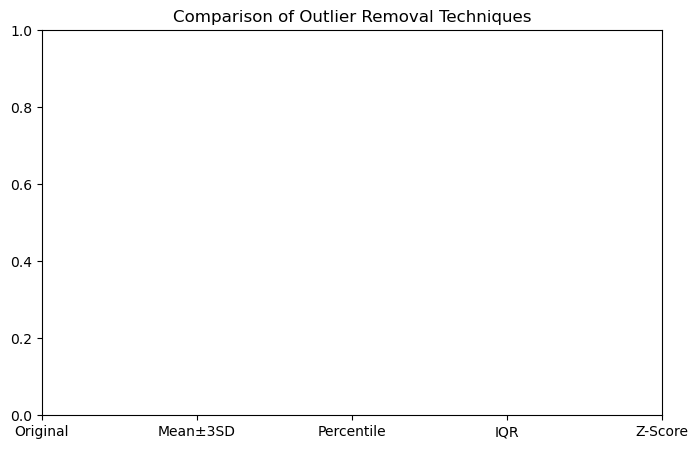

In [120]:
original_data = df[col].copy()
plt.figure(figsize=(8,5))
sns.boxplot(data = [original_data, mean_std_data, percentile_data, iqr_data, z_data])
plt.xticks([0,1,2,3,4], ['Original', 'Mean±3SD', 'Percentile', 'IQR', 'Z-Score'])
plt.title("Comparison of Outlier Removal Techniques")
plt.show()

# Q4. Normality and Transformation

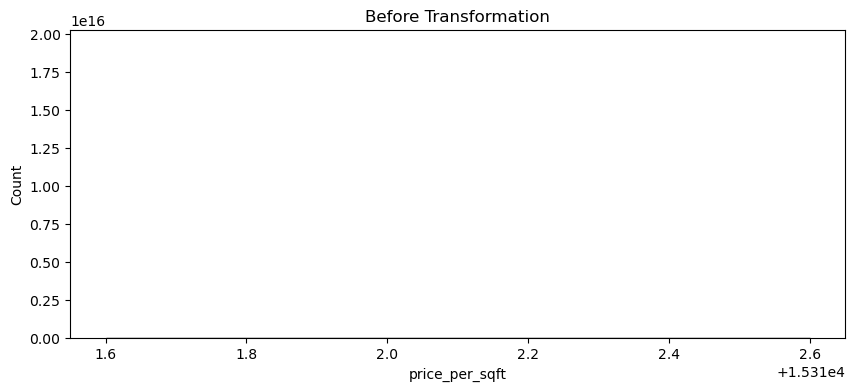

In [127]:
from scipy.stats import boxcox

# Histogram beforetransformation
plt.figure(figsize=(10,4))
sns.histplot(original_data,kde = True)
plt.title('Before Transformation')
plt.show()

In [ ]:
print("Skewness (before):", skew(original_data))
print("Kurtosis (before):",kurtosis(original_data))

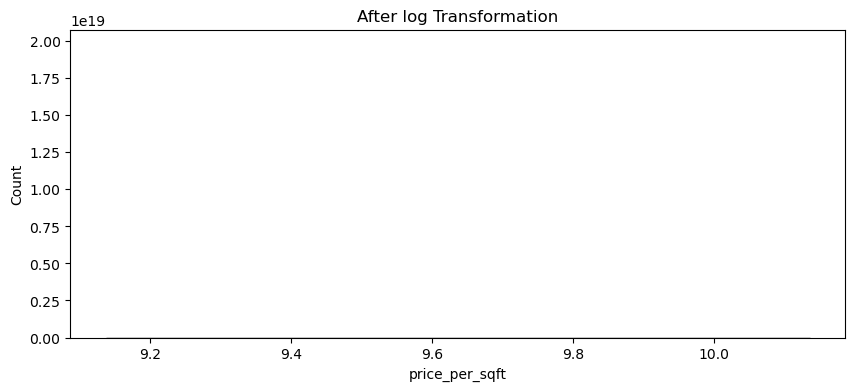

In [125]:
# Use log transformation
transformed_data = np.log1p(original_data)

plt.figure(figsize = (10,4))
sns.histplot(transformed_data, kde =True)
plt.title('After log Transformation')
plt.show()

In [128]:
print("Skewness after:", skew(original_data))
print("Kurtosis before:", kurtosis(original_data))

Skewness after: nan
Kurtosis before: nan


# Q5. Correlation Heatmap

In [130]:
numeric_df = df.select_dtypes(include = [np.number])
correlation = numeric_df.corr()

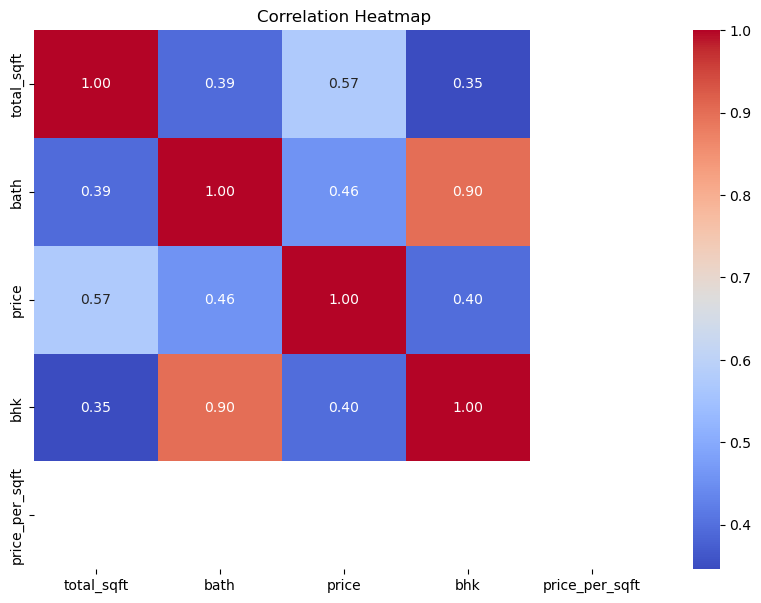

In [133]:
plt.figure(figsize= (10,7))
sns.heatmap(correlation, annot= True, cmap= 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

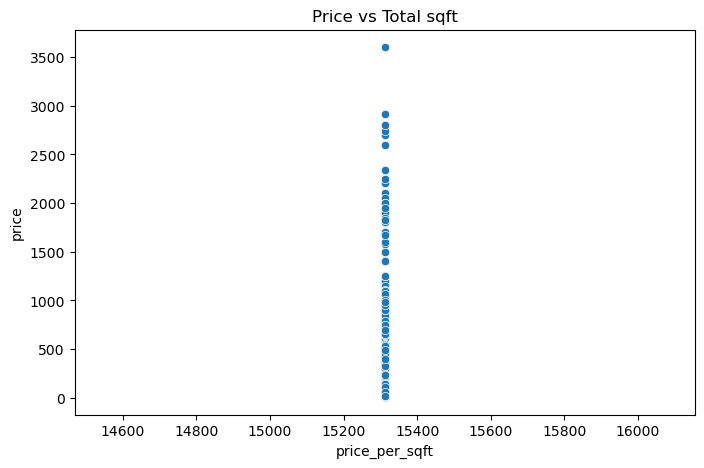

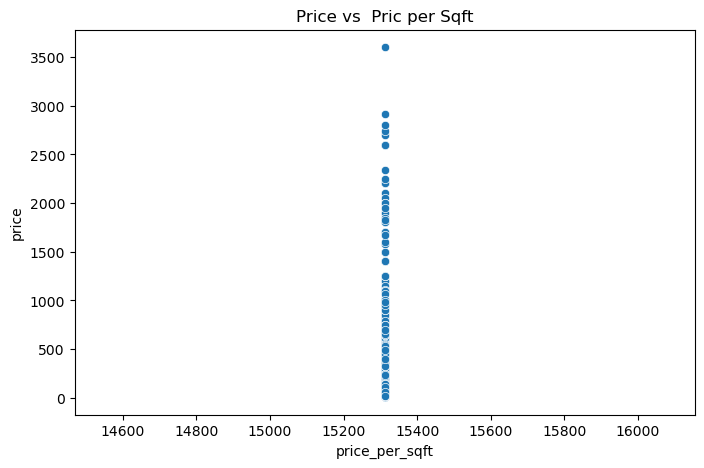

In [135]:
# Q6 Scatter plogts (example between price vs sqft)
if 'price' in df.columns and 'total_sqft' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df, x='price_per_sqft', y= 'price')
    plt.title('Price vs Total sqft')
    plt.show()

    plt.figure(figsize= (8,5))
    sns.scatterplot(data=df, x ='price_per_sqft', y='price')
    plt.title('Price vs  Pric per Sqft')
    plt.show()
else:
    print("Columns'price' and 'total_sqft' not found for scatter plots.")